In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


In [11]:
dir = "/content/Drive/MyDrive/AI/backups/old_2023.csv"

pandas_df = pd.read_csv(dir)

x = pandas_df['article'].to_numpy()
y = pandas_df['ticker_score'].to_numpy()


In [4]:
# prompt: I have an numpy array called y containing float values. I need those arrays to be int values. However, these int values can only be from 1 to 10. For example, float number 0.5732 should be 10 and float number -0.3 should be 2.
y_int = np.round(y * 10).astype(int)  # Scale and round to integers
y_int = np.clip(y_int, -10, 10)  # Ensure values are within the range [-10, 10]
y_int = y_int + 10  # Shift values to range [0, 20]


In [12]:
#without changing
y_int = y

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y_int, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [45]:
pipeMNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', ComplementNB())])
pipeSVC = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [65]:

pipeMNB.fit(x_train, y_train)
pipeCNB.fit(x_train, y_train)
pipeSVC.fit(x_train, y_train)

predictMNB = pipeMNB.predict(x_test)
predictCNB = pipeCNB.predict(x_test)
predictSVC = pipeSVC.predict(x_test)

print(f"MultinomialNB: {accuracy_score(y_test, predictMNB):.2f}")
print(f"ComplementNB: {accuracy_score(y_test, predictCNB):.2f}")
print(f"LinearSVC: {accuracy_score(y_test, predictSVC):.2f}")


MultinomialNB: 0.26
ComplementNB: 0.28
LinearSVC: 0.31


In [ ]:
# KERAS

In [6]:
import keras
import tensorflow as tf
import os

In [12]:
max = 0
for i in x_train:
  k = len(i.split())
  if k > max:
    max = k
    print(max)




322
408
440
654
683
945
1123
1131
4594


In [14]:
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower_and_strip_punctuation',
    split='whitespace'
)

vectorize_layer.adapt(x_train)
vocab_size = vectorize_layer.vocabulary_size()

#Sets model
model = keras.Sequential([

  keras.Input(shape=(1,), dtype=tf.string),

  keras.layers.TextVectorization(
      max_tokens=None,
      standardize="lower_and_strip_punctuation",
      split="whitespace",
      ngrams=None,
      output_mode="int",
      output_sequence_length=10000,
      pad_to_max_tokens=False,
      vocabulary=None,
      idf_weights=None,
      sparse=False,
      ragged=False,
      encoding="utf-8",
      name=None
  ),

    keras.layers.Embedding(vocab_size, 128),
    keras.layers.LSTM(128),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='tanh')
    #keras.layers.Dense(1000, activation='softmax')

])

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_6 (Text  (None, 10000)             0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 10000, 128)        3821952   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3961857 (15.11 MB)
Trainable params: 3961857 (15.11 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
model.layers[0].adapt(x_train)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=['mean_absolute_error'])
history = model.fit(x_train, y_train, epochs=20, validation_data = (x_val, y_val))

Epoch 1/20
23/23 [==============================] - 429s 19s/step - loss: 0.0327 - mean_absolute_error: 0.1336 - val_loss: 0.0315 - val_mean_absolute_error: 0.1271
Epoch 2/20
23/23 [==============================] - 419s 18s/step - loss: 0.0326 - mean_absolute_error: 0.1337 - val_loss: 0.0316 - val_mean_absolute_error: 0.1265
Epoch 3/20
23/23 [==============================] - 442s 19s/step - loss: 0.0339 - mean_absolute_error: 0.1353 - val_loss: 0.0316 - val_mean_absolute_error: 0.1290
Epoch 4/20
23/23 [==============================] - 445s 19s/step - loss: 0.0325 - mean_absolute_error: 0.1330 - val_loss: 0.0316 - val_mean_absolute_error: 0.1285
Epoch 5/20
23/23 [==============================] - 434s 19s/step - loss: 0.0326 - mean_absolute_error: 0.1335 - val_loss: 0.0318 - val_mean_absolute_error: 0.1264
Epoch 6/20
23/23 [==============================] - 436s 19s/step - loss: 0.0330 - mean_absolute_error: 0.1336 - val_loss: 0.0315 - val_mean_absolute_error: 0.1281
Epoch 7/20
23/23

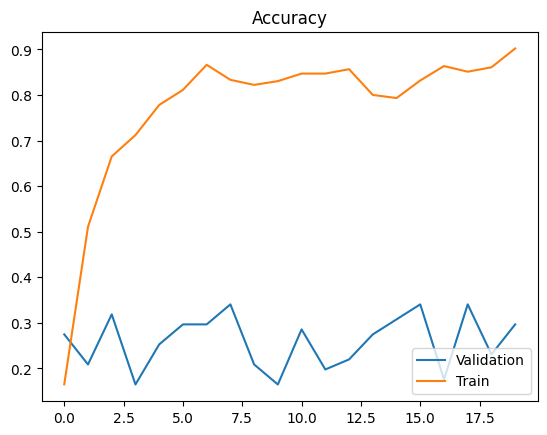

In [17]:
plt.plot(history.history['val_accuracy']) # eeğere validation set e böldüyssen
plt.plot(history.history['accuracy'])
plt.title("Accuracy")
plt.legend(["Validation", "Train"], loc='lower right') # legend sol üstteki validation training diyen

In [16]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 118ms/step - loss: 5379.3633 - accuracy: 0.2088


[5379.36328125, 0.20879121124744415]

In [ ]:
dir = '/content/Drive/MyDrive/AI/saves/save1.h5'
model.save(dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.src.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x7967103bb5b0>]

In [ ]:
#Things I learned
#Global input = [[1,2,3], [4,5,6], [7,8,9]]

keras.layers.GlobalMaxPooling1D()
# [[3], [6], [9]]



In [15]:
np.shape(x_train)
print(y_train[0])

0.120156
